In [1]:
import MRT_tool
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
MRT_URL = "https://data.taipei/api/frontstage/tpeod/dataset/resource.download?rid=eb481f58-1238-4cff-8caa-fa7bb20cb4f4"
time_list=[202401,202402]
total_data=pd.DataFrame([])

for when in time_list:
    print(f'正在取得{when}資料...')
    r=MRT_tool.get_url(MRT_URL,when)
    print(f'已取得{when}資料')
    
    url_content=list(r.text.split())
    for i in range(len(url_content)):
        url_content[i]=list(url_content[i].split(","))
    
    df=pd.DataFrame(url_content[1:],columns=url_content[0])
    
    # 清除人次為0
    df=df[(df["人次"]!="0")]

    # 將人次用成整數
    df["人次"]=df["人次"].astype(int)
    
    # 將日期 的 type 轉換成 datetime
    df["日期"]=pd.to_datetime(df["日期"])
    total_data=pd.concat([total_data,df])


正在取得202401資料...
已取得202401資料
正在取得202402資料...
已取得202402資料


In [3]:
# 選擇捷運站
station_list=["圓山","東門","台北車站"]
total_station=[]

for station in station_list:
    print(f'正在取得{station}捷運站資料...')
    df_get=MRT_tool.df_get_station(df,station)
    print(f'已取得{station}捷運站資料')
    print(df_get)
    total_station.append(df_get)
print("資料擷取完成")

正在取得圓山捷運站資料...
已取得圓山捷運站資料
              日期  時段    進站  出站  人次
0     2024-02-01  00  中山國中  圓山   1
1     2024-02-01  00  南京復興  圓山   1
2     2024-02-01  00  忠孝復興  圓山   4
3     2024-02-01  00    大安  圓山   1
4     2024-02-01  00   六張犁  圓山   2
...          ...  ..   ...  ..  ..
98859 2024-02-29  23    東門  圓山   7
98860 2024-02-29  23  徐匯中學  圓山   1
98861 2024-02-29  23  三重國小  圓山   1
98862 2024-02-29  23    丹鳳  圓山   1
98863 2024-02-29  23    中原  圓山   1

[98864 rows x 5 columns]
正在取得東門捷運站資料...
已取得東門捷運站資料
               日期  時段    進站  出站  人次
0      2024-02-01  00  南京復興  東門   1
1      2024-02-01  00  忠孝復興  東門   1
2      2024-02-01  00    大安  東門   1
3      2024-02-01  00    辛亥  東門   2
4      2024-02-01  00   動物園  東門   2
...           ...  ..   ...  ..  ..
103052 2024-02-29  23    東門  迴龍   5
103053 2024-02-29  23    東門  丹鳳   5
103054 2024-02-29  23  三和國中  東門   1
103055 2024-02-29  23    迴龍  東門   1
103056 2024-02-29  23    景平  東門   1

[103057 rows x 5 columns]
正在取得台北車站捷運站資料...
已取得台北車站捷運站資料
             

In [4]:
st=range(len(station_list))

In [5]:
st_=total_station[st[0]]
st_

,日期,時段,進站,出站,人次
0,2024-02-01,00,中山國中,圓山,1
1,2024-02-01,00,南京復興,圓山,1
2,2024-02-01,00,忠孝復興,圓山,4
3,2024-02-01,00,大安,圓山,1
4,2024-02-01,00,六張犁,圓山,2
...,...,...,...,...,...
98859,2024-02-29,23,東門,圓山,7
98860,2024-02-29,23,徐匯中學,圓山,1
98861,2024-02-29,23,三重國小,圓山,1
98862,2024-02-29,23,丹鳳,圓山,1


In [6]:
df=st_[st_["日期"]=="2024-02-01"]

In [7]:
enter=df[df["進站"]==station_list[st[0]]]
leave=df[df["出站"]==station_list[st[0]]]
enter,leave

(             日期  時段  進站    出站  人次
 18   2024-02-01  00  圓山    大安   1
 19   2024-02-01  00  圓山   六張犁   1
 20   2024-02-01  00  圓山  萬芳社區   1
 21   2024-02-01  00  圓山    木柵   1
 22   2024-02-01  00  圓山    新店   3
 ...         ...  ..  ..   ...  ..
 3466 2024-02-01  23  圓山  三民高中   4
 3467 2024-02-01  23  圓山  徐匯中學   2
 3468 2024-02-01  23  圓山  三重國小   7
 3469 2024-02-01  23  圓山    迴龍   6
 3470 2024-02-01  23  圓山    丹鳳   1
 
 [1735 rows x 5 columns],
              日期  時段    進站  出站  人次
 0    2024-02-01  00  中山國中  圓山   1
 1    2024-02-01  00  南京復興  圓山   1
 2    2024-02-01  00  忠孝復興  圓山   4
 3    2024-02-01  00    大安  圓山   1
 4    2024-02-01  00   六張犁  圓山   2
 ...         ...  ..   ...  ..  ..
 3507 2024-02-01  23    菜寮  圓山   1
 3508 2024-02-01  23  大橋頭站  圓山   1
 3509 2024-02-01  23   行天宮  圓山   2
 3510 2024-02-01  23    東門  圓山   6
 3511 2024-02-01  23  三和國中  圓山   1
 
 [1796 rows x 5 columns])

In [8]:
x=sorted(list(set(df["時段"])))
y1=[enter[(enter["時段"]==i)]["人次"].sum() for i in x]
y2=[leave[(leave["時段"]==i)]["人次"].sum() for i in x]

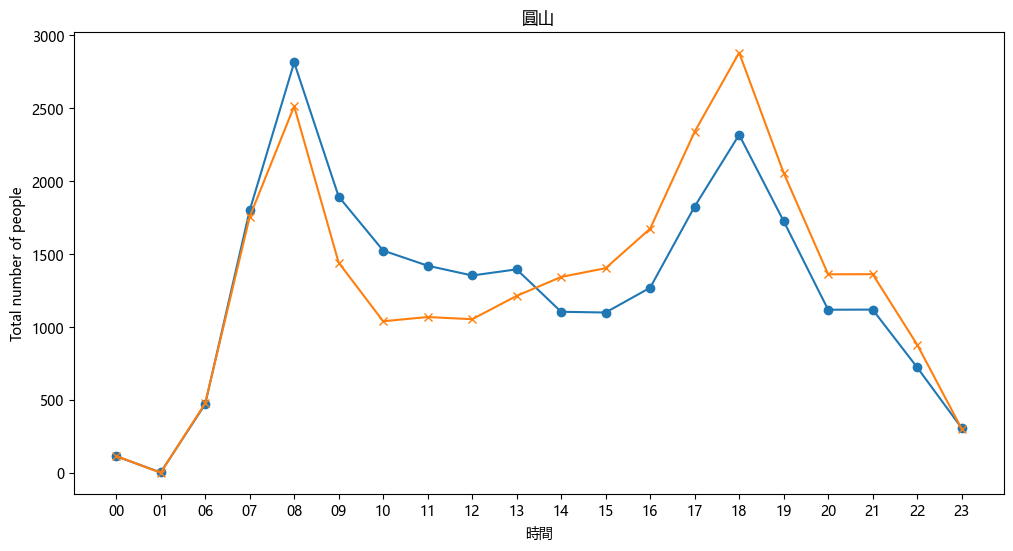

In [9]:
plt.figure(figsize=(12,6))

plt.rcParams['font.family']='Microsoft YaHei'

plt.xlabel('時間')
plt.ylabel('Total number of people')
plt.title(f"{station_list[st[0]]}")

plt.plot(x,y1,"-o",x,y2,"-x")

plt.show()

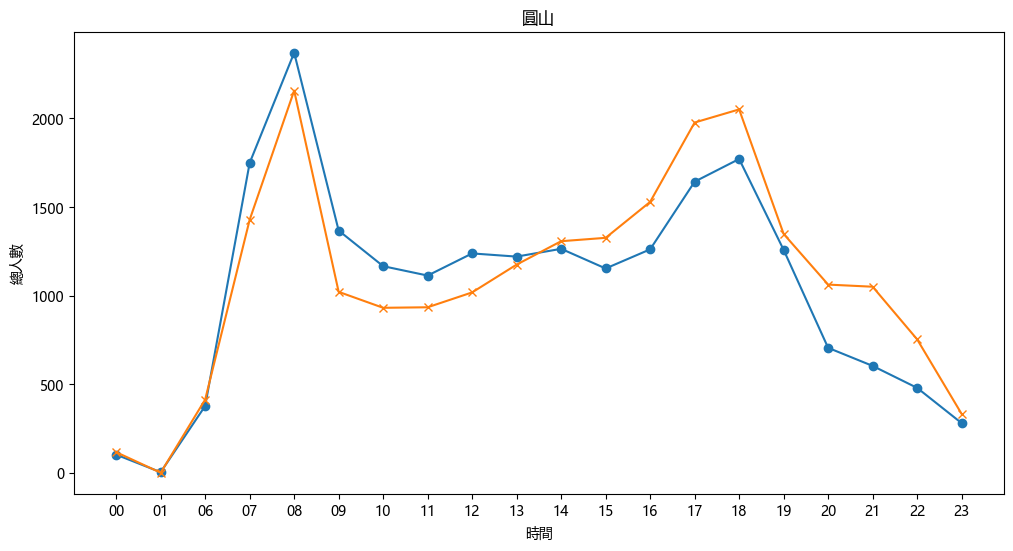

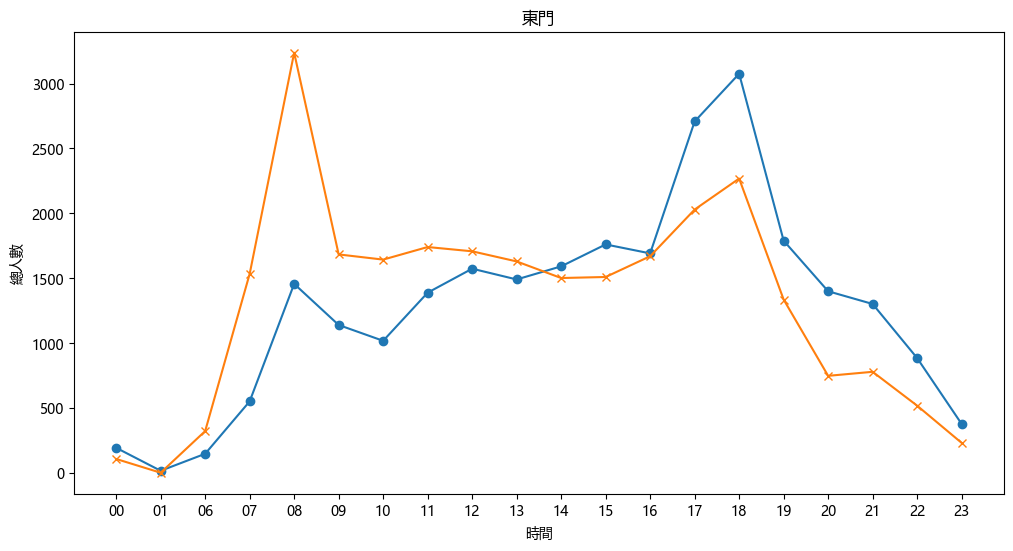

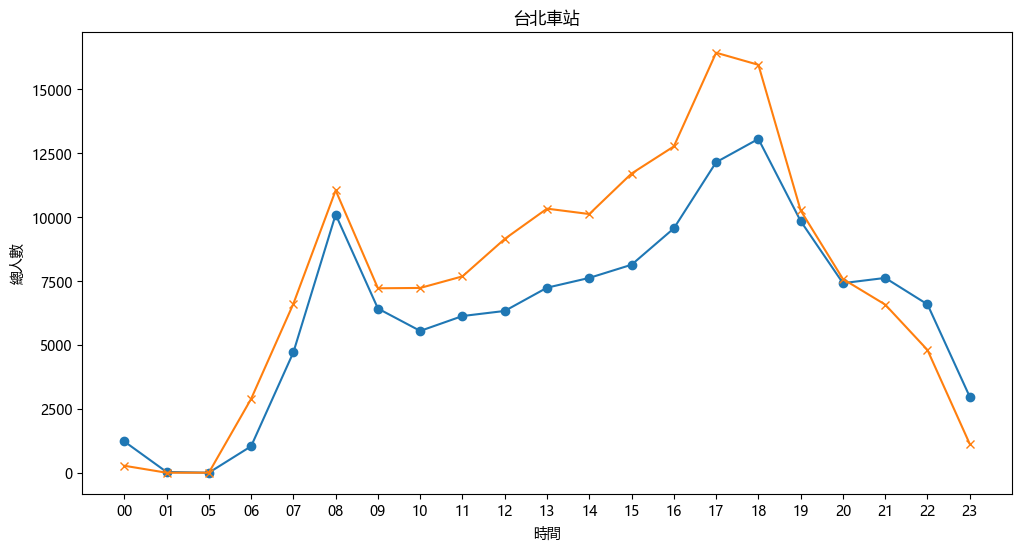

In [10]:
for i in st:
    # print(total_station[st[i]])
    st_=total_station[st[i]]
    df=st_[st_["日期"]=="2024-02-07"]
    enter=df[df["進站"]==station_list[st[i]]]
    leave=df[df["出站"]==station_list[st[i]]]

    x=sorted(list(set(df["時段"])))
    y1=[enter[(enter["時段"]==i)]["人次"].sum() for i in x]
    y2=[leave[(leave["時段"]==i)]["人次"].sum() for i in x]

    plt.figure(figsize=(12,6))
    
    plt.rcParams['font.family']='Microsoft YaHei'
    
    plt.xlabel('時間')
    plt.ylabel('總人數')
    plt.title(f"{station_list[st[i]]}")
    
    plt.plot(x,y1,"-o",x,y2,"-x")
    
    plt.show()
    